<img SRC="img03.webp"/>
<center><h1 style="color:#E9989A">Emisiones de CO2 en CRI</h1></center>
<center><h4 style="color:#000000">Universidad Castro Carazo</h4></center>
<center><h6 style="color:#000000">II Cuatrimestre 2022</h6></center>
<center><h6 style="color:#000000">Proyecto Final</h6></center>
</br>
</br>
<p style="text-align: justify"> Costa Rica es el país número 69 del ranking de países por emisiones de CO2, formado por 184 países, en el que se ordenan los países de menos a más contaminantes.
La pregunta de negocio por responder es: ¿Cual estrategia podria implementar para generar una mayor rotacion de inventario?</p>

<p style="text-align: justify">El objetivo principal, es poder identificar el cantón con mayor número de emisiones, y poder encontrar alguna solución para reducir ese número.</p>

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
cols= ["Cantón", "AFOLU", "Energía Estacionaria", "Procesos industriales y uso de productos","Residuos", "Silvicultura y otros usos de la tierra", "Transporte", "Total"]
       
df_2= pd.read_csv("PPCN1.csv", names=cols)

In [3]:
df_2.shape

(20, 8)

In [4]:
df_2.columns

Index(['Cantón', 'AFOLU', 'Energía Estacionaria',
       'Procesos industriales y uso de productos', 'Residuos',
       'Silvicultura y otros usos de la tierra', 'Transporte', 'Total'],
      dtype='object')

In [5]:
df_2.tail(10)

,Cantón,AFOLU,Energía Estacionaria,Procesos industriales y uso de productos,Residuos,Silvicultura y otros usos de la tierra,Transporte,Total
10,Cantón de Pococí,75199.02,16643.98,NR,38343.72,NR,2.793289e+05,4.095156e+05
11,Cantón de Cañas,63285.05,5630.22,NR,10315.16,NR,5.494481e+04,1.341752e+05
12,Cantón de Santa Cruz,152139.47,20200.82,1430.53,30733.34,NR,9.894289e+04,3.034470e+05
13,Cantón de Pérez Zeledón,73099.98,19235.78,312.98,35190.44,NR,1.877883e+05,3.156274e+05
14,Cantón de Montes de Oca,713.41,12673.72,NR,22611.88,NR,1.181998e+05,1.541989e+05
15,Cantón de Parrita,29020.29,3048.57,279.56,15871.68,NR,3.045205e+04,7.867215e+04
16,Cantón de Cartago,-2270.39,458654.00,332773,63519.00,NR,2.208880e+05,1.073564e+06
17,Cantón de Nicoya,159356.06,8126.35,24.5,14859.12,NR,8.171267e+04,2.640787e+05
18,Cantón de San Carlos,120974.3188,101885.04,1723.88,48487.75,NR,2.760098e+05,5.490808e+05
19,Totales,803986.2888,1321944.22,438208.45,794119.49,NR,2.607417e+06,5.965676e+06


In [6]:
df_2.describe()

,Energía Estacionaria,Residuos,Transporte,Total
count,2.000000e+01,20.000000,2.000000e+01,2.000000e+01
mean,1.321944e+05,79411.949000,2.607417e+05,5.965676e+05
std,3.040049e+05,173542.577045,5.690130e+05,1.298089e+06
min,2.792020e+03,2078.490000,5.342930e+03,1.635983e+04
25%,8.088270e+03,15618.540000,5.300395e+04,1.491929e+05
50%,1.694208e+04,33254.035000,1.028502e+05,2.089161e+05
75%,1.079121e+05,52245.562500,1.960632e+05,4.097287e+05
max,1.321944e+06,794119.490000,2.607417e+06,5.965676e+06


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cantón                                    20 non-null     object 
 1   AFOLU                                     20 non-null     object 
 2   Energía Estacionaria                      20 non-null     float64
 3   Procesos industriales y uso de productos  20 non-null     object 
 4   Residuos                                  20 non-null     float64
 5   Silvicultura y otros usos de la tierra    20 non-null     object 
 6   Transporte                                20 non-null     float64
 7   Total                                     20 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.4+ KB


In [8]:
df_2.describe()

,Energía Estacionaria,Residuos,Transporte,Total
count,2.000000e+01,20.000000,2.000000e+01,2.000000e+01
mean,1.321944e+05,79411.949000,2.607417e+05,5.965676e+05
std,3.040049e+05,173542.577045,5.690130e+05,1.298089e+06
min,2.792020e+03,2078.490000,5.342930e+03,1.635983e+04
25%,8.088270e+03,15618.540000,5.300395e+04,1.491929e+05
50%,1.694208e+04,33254.035000,1.028502e+05,2.089161e+05
75%,1.079121e+05,52245.562500,1.960632e+05,4.097287e+05
max,1.321944e+06,794119.490000,2.607417e+06,5.965676e+06


In [9]:
df_2.head(10)

,Cantón,AFOLU,Energía Estacionaria,Procesos industriales y uso de productos,Residuos,Silvicultura y otros usos de la tierra,Transporte,Total
0,Cantón de Belén,167.22,172363.57,93583.57,13612.05,NR,130641.42,410367.83
1,Cantón de Desamparados,2805.13,17240.18,NR,66850.36,NR,106757.46,193653.13
2,Cantón de Golfito,27714.89,7974.03,4409.58,31317.63,NR,47181.36,118597.49
3,Cantón de La Unión,5167.98,21867.68,NR,44269.59,NR,83010.31,154315.56
4,Cantón Central de Puntarenas,NR,125993.27,NR,13878.83,NR,34081.60,173953.70
5,Distrito de Monteverde,5494.54,2792.02,651.85,2078.49,NR,5342.93,16359.83
6,Cantón Central de San José,16.77,298575.02,NR,201007.88,NR,617187.85,1116787.52
7,Cantón de San Ramón,58828,10974.00,255,42846.00,NR,111276.00,224179.00
8,Cabtón de Quepos,13123.55,7594.97,2738.72,78555.57,NR,77217.87,179230.68
9,Cabtón de Oreamuno,19151,10471.00,25.28,19771.00,NR,46453.00,95871.28


In [10]:
df_2.replace("?", np.nan, inplace=True)
df_2.head(10)

,Cantón,AFOLU,Energía Estacionaria,Procesos industriales y uso de productos,Residuos,Silvicultura y otros usos de la tierra,Transporte,Total
0,Cantón de Belén,167.22,172363.57,93583.57,13612.05,NR,130641.42,410367.83
1,Cantón de Desamparados,2805.13,17240.18,NR,66850.36,NR,106757.46,193653.13
2,Cantón de Golfito,27714.89,7974.03,4409.58,31317.63,NR,47181.36,118597.49
3,Cantón de La Unión,5167.98,21867.68,NR,44269.59,NR,83010.31,154315.56
4,Cantón Central de Puntarenas,NR,125993.27,NR,13878.83,NR,34081.60,173953.70
5,Distrito de Monteverde,5494.54,2792.02,651.85,2078.49,NR,5342.93,16359.83
6,Cantón Central de San José,16.77,298575.02,NR,201007.88,NR,617187.85,1116787.52
7,Cantón de San Ramón,58828,10974.00,255,42846.00,NR,111276.00,224179.00
8,Cabtón de Quepos,13123.55,7594.97,2738.72,78555.57,NR,77217.87,179230.68
9,Cabtón de Oreamuno,19151,10471.00,25.28,19771.00,NR,46453.00,95871.28


In [11]:
valoresPerdidos = df_2.isnull()
valoresPerdidos.head(10)

,Cantón,AFOLU,Energía Estacionaria,Procesos industriales y uso de productos,Residuos,Silvicultura y otros usos de la tierra,Transporte,Total
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [12]:
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print("")

Cantón
False    20
Name: Cantón, dtype: int64

AFOLU
False    20
Name: AFOLU, dtype: int64

Energía Estacionaria
False    20
Name: Energía Estacionaria, dtype: int64

Procesos industriales y uso de productos
False    20
Name: Procesos industriales y uso de productos, dtype: int64

Residuos
False    20
Name: Residuos, dtype: int64

Silvicultura y otros usos de la tierra
False    20
Name: Silvicultura y otros usos de la tierra, dtype: int64

Transporte
False    20
Name: Transporte, dtype: int64

Total
False    20
Name: Total, dtype: int64



In [13]:
df_2.dtypes

Cantón                                       object
AFOLU                                        object
Energía Estacionaria                        float64
Procesos industriales y uso de productos     object
Residuos                                    float64
Silvicultura y otros usos de la tierra       object
Transporte                                  float64
Total                                       float64
dtype: object

In [14]:
dftemp = df_2[['Cantón','Residuos','Transporte']]
dftemp

,Cantón,Residuos,Transporte
0,Cantón de Belén,13612.05,1.306414e+05
1,Cantón de Desamparados,66850.36,1.067575e+05
2,Cantón de Golfito,31317.63,4.718136e+04
3,Cantón de La Unión,44269.59,8.301031e+04
4,Cantón Central de Puntarenas,13878.83,3.408160e+04
5,Distrito de Monteverde,2078.49,5.342930e+03
6,Cantón Central de San José,201007.88,6.171878e+05
7,Cantón de San Ramón,42846.00,1.112760e+05
8,Cabtón de Quepos,78555.57,7.721787e+04
9,Cabtón de Oreamuno,19771.00,4.645300e+04


In [15]:
bins = np.linspace(min(df_2["Residuos"]), max(df_2["Residuos"]), 4)
bins

array([  2078.49      , 266092.15666667, 530105.82333333, 794119.49      ])

In [16]:
nombre = ["pequeño","mediano","grande"]
df_2["Residuos-bins"] =pd.cut(df_2["Residuos"],bins, labels=nombre, include_lowest=True)
df_2.head(5)

,Cantón,AFOLU,Energía Estacionaria,Procesos industriales y uso de productos,Residuos,Silvicultura y otros usos de la tierra,Transporte,Total,Residuos-bins
0,Cantón de Belén,167.22,172363.57,93583.57,13612.05,NR,130641.42,410367.83,pequeño
1,Cantón de Desamparados,2805.13,17240.18,NR,66850.36,NR,106757.46,193653.13,pequeño
2,Cantón de Golfito,27714.89,7974.03,4409.58,31317.63,NR,47181.36,118597.49,pequeño
3,Cantón de La Unión,5167.98,21867.68,NR,44269.59,NR,83010.31,154315.56,pequeño
4,Cantón Central de Puntarenas,NR,125993.27,NR,13878.83,NR,34081.60,173953.70,pequeño


In [17]:
df_2[["Residuos","Residuos-bins"]].head(10)

,Residuos,Residuos-bins
0,13612.05,pequeño
1,66850.36,pequeño
2,31317.63,pequeño
3,44269.59,pequeño
4,13878.83,pequeño
5,2078.49,pequeño
6,201007.88,pequeño
7,42846.00,pequeño
8,78555.57,pequeño
9,19771.00,pequeño


In [18]:
df_2[["Residuos-bins"]].value_counts()

Residuos-bins
pequeño          19
grande            1
mediano           0
dtype: int64

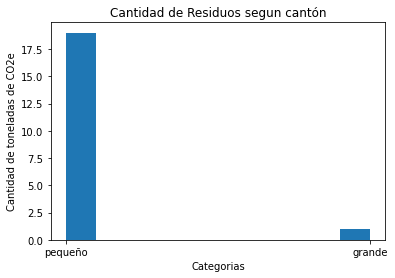

In [19]:
plt.hist(df_2["Residuos-bins"])
plt.xlabel("Categorias")
plt.ylabel("Cantidad de toneladas de CO2e")
plt.title("Cantidad de Residuos segun cantón")
plt.show()

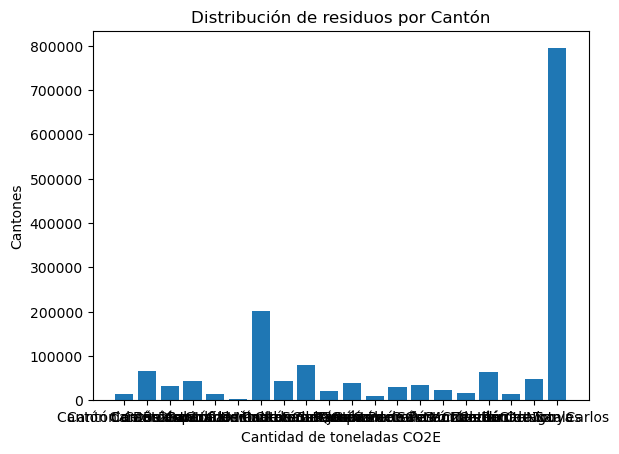

In [27]:
eje_x = df_2 ['Cantón']

eje_y = df_2 ['Residuos']

plt.bar(eje_x, eje_y)

plt.ylabel("Cantones")

plt.xlabel("Cantidad de toneladas CO2E")

plt.title("Distribución de residuos por Cantón")

plt.show()